# Plotting planes and determining fold axes

This is an example notebook for plotting planes used in EPS 101.

## Install mplstereonet if you don't yet have it installed

In [1]:
import sys
!{sys.executable} -m pip install mplstereonet

## Import packages for plotting and analyzing data

In [2]:
import matplotlib.pyplot as plt
import mplstereonet
import pandas as pd
import numpy as np

# Plot a plane and a line

Let's plot a plane and a line considering the plane to represent a fault plane and the line to be a slickenline on that plane.

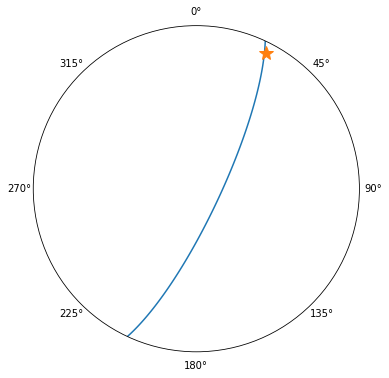

In [3]:
fault_strike, fault_dip = 25, 78
slick_trend, slick_plunge = 27, 7

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the plane
ax.plane(fault_strike, fault_dip)

# Plot the line
ax.line(slick_plunge, slick_trend, marker='*', markersize=15)

plt.show()

# Plot two planes

We can plot two planes. In this case let's consider them to be planes on either limb of an anticline.

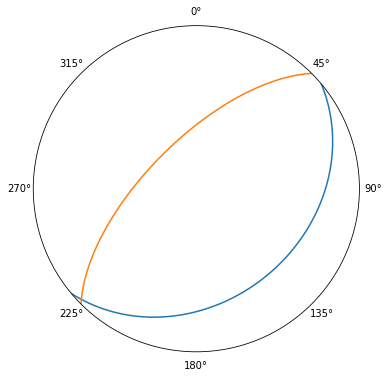

In [4]:
strike1 = 50
dip1 = 32

strike2 = 225
dip2 = 66

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the two planes...
ax.plane(strike1, dip1)
ax.plane(strike2, dip2)

plt.show()

## Determine the intersection between the planes and plot it too

The function ```mplstereonet.plane_intersection``` will find the intersection of two planes.

In [5]:
# Find the intersection of the two as a plunge/bearing
plunge, trend = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)

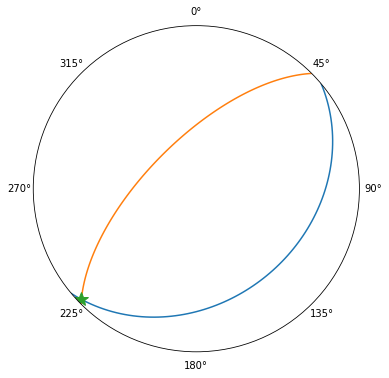

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the two planes...
ax.plane(strike1, dip1)
ax.plane(strike2, dip2)

# Plot the plunge/trend
ax.line(plunge, trend, marker='*', markersize=15)

plt.savefig('example_figure.pdf')
plt.show()

## Display the intersection between the planes as text

In [7]:
print("The trend of the fold axis is:")
print(trend)
print("The plunge of the fold axis is:")
print(plunge)

The trend of the fold axis is:
[226.0876685]
The plunge of the fold axis is:
[2.44131822]


## Plot a plane and its pole

The pole to a plane can be plotted along with the plane.

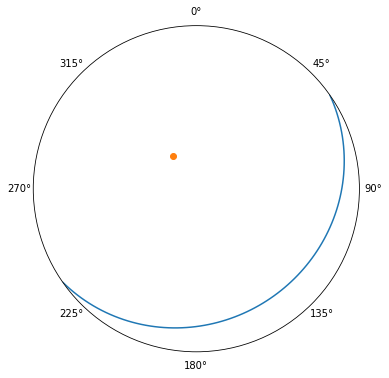

In [8]:
strike3 = 55
dip3 = 20

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(strike3, dip3)
ax.pole(strike3, dip3)

plt.show()

## Plot a lot of planes and determine the fold axis

We can use pandas to import lots of planes

In [9]:
fake_planes_data = pd.read_csv('fake_planes.csv')
fake_planes_data

,strike,dip
0,301.612782,83.526003
1,306.092876,75.216800
2,300.649056,88.755718
3,300.539252,71.767969
4,296.297720,67.301052
5,311.796986,52.273319
6,297.197393,62.793971
7,265.787145,38.540912
8,295.306304,34.171437
9,248.503368,22.206321


### Make lists of strike and dip from the pandas dataframe

In [10]:
fake_planes_strike = fake_planes_data['strike']
fake_planes_dip = fake_planes_data['dip']

## Plot all the planes, plot the planes and poles, plot the poles by themselves

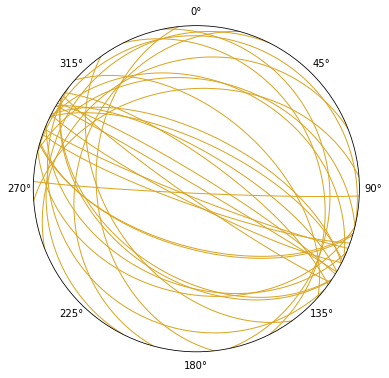

In [11]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(fake_planes_strike, fake_planes_dip, color='goldenrod', linewidth=1)

plt.show()

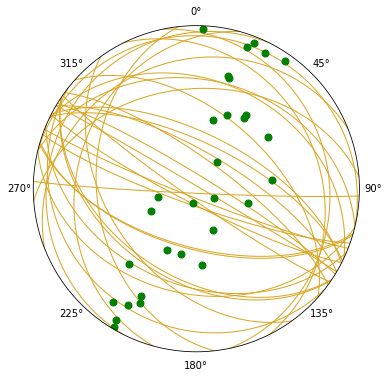

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(fake_planes_strike, fake_planes_dip, color='goldenrod', linewidth=1)
ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

plt.show()

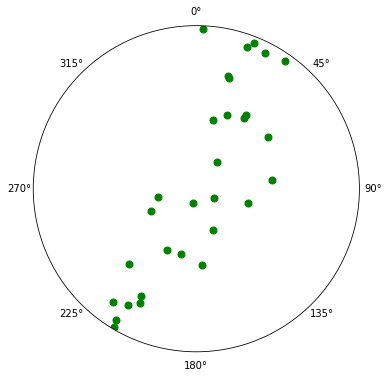

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

plt.show()

## We can fit a plane to the poles

Using the function ```mplstereonet.fit_girdle```

In [14]:
fit_strike, fit_dip = mplstereonet.fit_girdle(fake_planes_strike, fake_planes_dip)

In [15]:
print(fit_strike)
print(fit_dip)

26.99340538904562
84.97114772293412


The trend and plunge of the pole to the plane can be calculated

In [16]:
pole_trend = fit_strike-90+360
pole_plunge = 90-fit_dip
print('The fold axis has a trend of:')
print(pole_trend)
print('and a plunge of')
print(pole_plunge)

The fold axis has a trend of:
296.9934053890456
and a plunge of
5.02885227706588


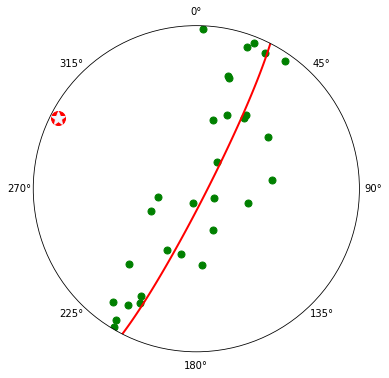

In [17]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

ax.line(pole_plunge, pole_trend, marker='*', color='aliceblue', markersize=14)

plt.savefig('test_plot_fit.pdf')
plt.show()

# Import your own planes

In [18]:
my_planes = pd.read_csv('plane.csv')
my_planes.head()

,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,horiz_precision,vert_precision,planeType,dip,dipAzimuth,strike,declination,rockUnit,timedate,notes
0,e0fe9f43125fe6cb1444afb6c1b0eb81,Locality 1,34e78266deab91ad57aef1893efa8271,569211.978532,4.193007e+06,37.881935,-122.212951,10S,425.059771,5.0,3.0,Flow Band,24.0,249.0,159.0,13.396,Upper Moraga,Fri Mar 8 15:19:23 2019,
1,e0fe9f43125fe6cb1444afb6c1b0eb81,Locality 1,1d7f9de98cc697618b9128a0fcee2566,570275.942033,4.192618e+06,37.878346,-122.200891,10S,384.834063,5.0,4.0,Bedding,29.0,182.0,92.0,13.396,Moraga Tuff,Fri Mar 8 14:15:01 2019,
2,e0fe9f43125fe6cb1444afb6c1b0eb81,Locality 1,e136fe8c5e74686c334f405d425894fc,568778.628126,4.192724e+06,37.879414,-122.217905,10S,505.131060,0.0,0.0,Flow Band,33.0,198.0,108.0,13.396,Bald Peak,Fri Mar 8 12:47:20 2019,
3,e0fe9f43125fe6cb1444afb6c1b0eb81,Locality 1,98fd01f345e12c662903ef9da4a79639,570713.258381,4.192293e+06,37.875379,-122.195951,10S,357.007277,0.0,0.0,Bedding,18.0,90.0,0.0,13.396,Moraga Tuff,Fri Mar 1 14:04:00 2019,
4,e0fe9f43125fe6cb1444afb6c1b0eb81,Locality 1,19971c70ca7efe262dce0fe135532aa2,570954.439953,4.192178e+06,37.874330,-122.193220,10S,336.347670,0.0,0.0,Bedding,47.0,105.0,15.0,13.396,Moraga Tuff,Fri Mar 1 13:39:08 2019,


In [19]:
my_planes.columns

Index(['localityId', ' localityName', ' dataId', ' x', ' y', ' latitude',
       ' longitude', ' zone', ' altitude', ' horiz_precision',
       ' vert_precision', ' planeType', ' dip', ' dipAzimuth', ' strike',
       ' declination', ' rockUnit', ' timedate', ' notes'],
      dtype='object')

In [20]:
my_strikes = my_planes[' strike']
my_dips = my_planes[' dip']

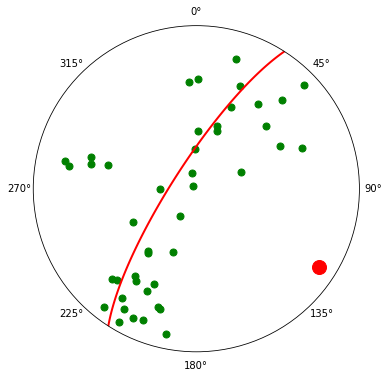

In [21]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(my_strikes, my_dips, marker='.', color='green', markersize=14)

fit_strike, fit_dip = mplstereonet.fit_girdle(my_strikes, my_dips)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

plt.show()

# And if you want to get fancy

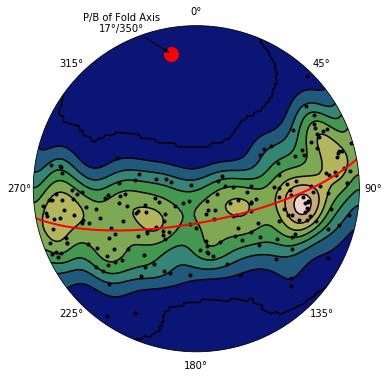

In [22]:
# Generate a random girdle distribution from the plunge/bearing of a fold hinge
# In the end, we'll have strikes and dips as measured from bedding in the fold.
# *strike* and *dip* below would normally be your input.
num_points = 200
real_bearing, real_plunge = 350, 15
s, d = mplstereonet.plunge_bearing2pole(real_plunge, real_bearing)
lon, lat = mplstereonet.plane(s, d, segments=num_points)
lon += np.random.normal(0, np.radians(15), lon.shape)
lat += np.random.normal(0, np.radians(15), lat.shape)
strike, dip = mplstereonet.geographic2pole(lon, lat)

# Plot the raw data and contour it:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')
ax.density_contourf(strike, dip, cmap='gist_earth')
ax.density_contour(strike, dip, colors='black')
ax.pole(strike, dip, marker='.', color='black')

# Fit a plane to the girdle of the distribution and display it.
fit_strike, fit_dip = mplstereonet.fit_girdle(strike, dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

# Add some annotation of the result
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (bearing,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'P/B of Fold Axis\n{:02.0f}\u00b0/{:03.0f}\u00b0'
ax.annotate(template.format(plunge, bearing), ha='center', va='bottom',
            xy=(lon, lat), xytext=(-50, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))

plt.savefig('fancy_figure.pdf')
plt.show()

In [23]:
strike.tolist()

[[334.65045283430277],
 [165.73599005747923],
 [143.15063978086317],
 [8.945030007255752],
 [173.32152531803138],
 [155.55826939484768],
 [357.79900301901796],
 [335.66120305505575],
 [174.4745689806099],
 [355.57030040411064],
 [337.04774389818357],
 [339.3252101263063],
 [344.20285132015636],
 [347.8719981502791],
 [194.24200013967402],
 [353.72063792538347],
 [344.8207039997995],
 [9.293128441569706],
 [339.5288923169418],
 [163.42772403566784],
 [312.31845739122264],
 [177.98189009308817],
 [343.44075566063884],
 [350.44424191840676],
 [350.8501732491661],
 [335.34216033351527],
 [359.3294738006199],
 [330.4031558587209],
 [347.9210128866306],
 [358.1351209355578],
 [9.258892526196178],
 [355.3449031099387],
 [302.16933617662716],
 [342.29013821125903],
 [323.04880686764056],
 [296.0747256404195],
 [323.48041819396485],
 [20.972714585957874],
 [329.3099100957478],
 [350.64599107115043],
 [347.97021877283964],
 [337.0919202353183],
 [332.9249533410615],
 [347.99149067785453],
 [322.